In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adp-kr-p4/problem2_usage_history.csv
/kaggle/input/adp-kr-p4/problem1.csv
/kaggle/input/adp-kr-p4/problem2_usage.csv
/kaggle/input/adp-kr-p4/problem2_avg_tem.csv


# 1번
철강데이터 종속변수 : target     
데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates    
데이터 경로 : /kaggle/input/adp-kr-p4/problem1.csv


### 1-1  EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

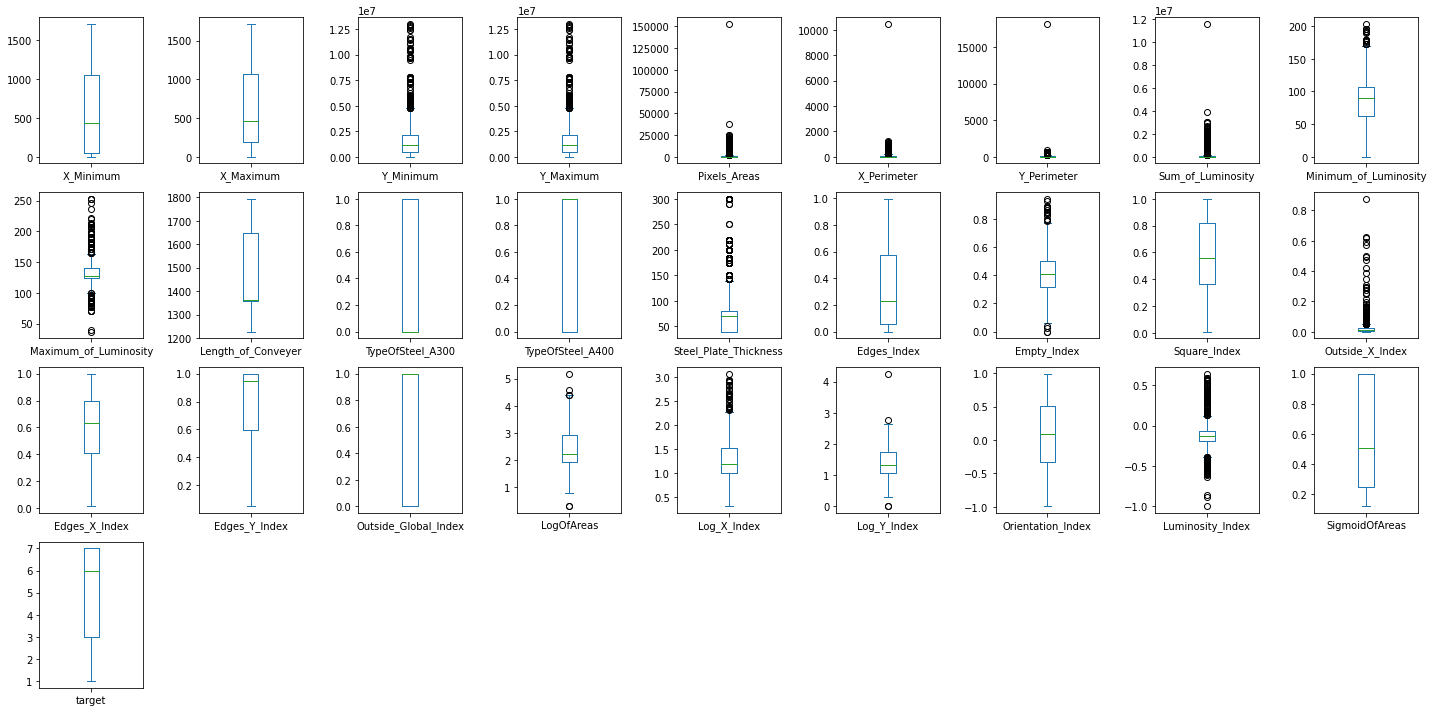

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


In [2]:
df = pd.read_csv('/kaggle/input/adp-kr-p4/problem1.csv')
df.info()
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout = (4,9),figsize=(20,10))
plt.tight_layout()
plt.show()

pd.set_option('display.max_columns',30)
df.head()

In [3]:
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in df.columns:
    target = df[col]
    if target.nunique() <=10:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()
        

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
TypeOfSteel_A300 [1 0]


,TypeOfSteel_A300
0,1164
1,777



TypeOfSteel_A400 [0 1]


,TypeOfSteel_A400
1,1164
0,777



Outside_Global_Index [1.  0.5 0. ]


,Outside_Global_Index
1.0,1072
0.0,778
0.5,91



target [1 2 3 4 5 6 7]


,target
7,673
6,402
3,391
2,190
1,158
4,72
5,55


### 1-2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%))
(시각화와 통계량을 제시할 것)

파생변수로 X_Minimum와 X_Maximum의 평균값을 av 컬럼에 만든다

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

df['av']  = (df['X_Minimum'] + df['X_Maximum'])/2
value ='+'.join(list(df.drop(columns=['target']).columns))
model = ols(f'target ~ {value}', df)
model.exog_names


vif = pd.DataFrame({'col': col, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, col in enumerate(model.exog_names[1:])).sort_values('VIF',ascending=False)

vif

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,col,VIF
13,Steel_Plate_Thickness,inf
1,X_Maximum,inf
2,Y_Minimum,inf
12,TypeOfSteel_A400,inf
4,Pixels_Areas,1.703264e+10
3,Y_Maximum,1.703244e+10
7,Sum_of_Luminosity,1.559205e+03
22,Log_X_Index,1.185824e+03
18,Edges_X_Index,1.000563e+03
23,Log_Y_Index,4.911691e+02


vif값이 10 미만인 Outside_Global_Index,Maximum_of_Luminosity , Length_of_Conveyer, LogOfAreas, Edges_Y_Index, TypeOfSteel_A300, Outside_X_Index, Empty_Index, Edges_Index, X_Minimum, av 정도가 다중공선성이 없는 변수로 판단한다

In [5]:
df2 = df.copy()[list(vif[vif.VIF<10].col.values)+['target']]

from sklearn.model_selection import train_test_split

X = df2.drop(columns=['target'])
y = df2['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,test_size=0.2,stratify=y)



### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.
confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [6]:
y_train_l = y_train.copy()
y_test_l = y_test.copy()

y_train_l =y_train_l.map(lambda x : 1 if x==1 else 0)
y_test_l =y_test_l.map(lambda x : 1 if x==1 else 0)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train.values, y_train_l.values)


pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report,roc_curve

print(classification_report(y_test_l,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       357
           1       0.33      0.06      0.11        32

    accuracy                           0.91       389
   macro avg       0.63      0.53      0.53       389
weighted avg       0.87      0.91      0.88       389



In [7]:
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test_l.values, y_prob[:,1],pos_label=1)
J = tpr - fpr
ix = np.argmax(J)
cutoff = thresholds[ix]
cutoff

0.07472384206553463

### 1-4 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.
각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라. (? cut off value 구하는데 뭔가 문제가 있는데,, 문제 오류일까요?)

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


s = SVC(probability=True)
rf = RandomForestClassifier(random_state=43)
d = DecisionTreeClassifier(random_state=43)


def check_model(model):
    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    print(classification_report(y_test,pred))

    
for name,model in [('svm',s),('randomforest',rf),('decision tree',d)]:
    print(name)
    check_model(model)
    print()

svm


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        38
           3       0.55      0.95      0.69        78
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        81
           7       0.44      0.84      0.58       135

    accuracy                           0.48       389
   macro avg       0.14      0.26      0.18       389
weighted avg       0.26      0.48      0.34       389


randomforest
              precision    recall  f1-score   support

           1       0.59      0.41      0.48        32
           2       0.94      0.87      0.90        38
           3       0.96      0.97      0.97        78
           4       0.93      0.93      0.93        14
           5       0.80      0.73      0.76        11
           6       0.56      0.63      0.59        81
          

### 1-5 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라. 
군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라 

In [9]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['target'])
y = df2['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,test_size=0.2,stratify=y)



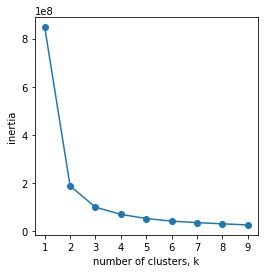

In [10]:
from sklearn.cluster import KMeans

lst = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    lst.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(range(1,10), lst, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))
plt.show()

#최고 레이블수 3개

In [11]:
clust_model = KMeans(n_clusters = 3 , random_state = 42  , algorithm='auto' )
values = clust_model.fit_predict(X_train)  

X_train_cluster = X_train.reset_index(drop=True).copy()
X_test_cluster = X_test.reset_index(drop=True).copy()

X_train_cluster.loc[:,'cluster'] = values
pred = clust_model.predict(X_test) 
X_test_cluster.loc[:,'cluster'] = pred



rf = RandomForestClassifier(random_state=43)
rf.fit(X_train_cluster,y_train)
pred = rf.predict(X_test_cluster)
y_prob = rf.predict_proba(X_test_cluster)
print(classification_report(y_test,pred))

# f1-score값이 증가한 레이블도 있고 감소한 레이블도 존재한다. accuracy값은 동일하다

              precision    recall  f1-score   support

           1       0.65      0.41      0.50        32
           2       0.94      0.84      0.89        38
           3       0.96      0.97      0.97        78
           4       0.93      0.93      0.93        14
           5       0.89      0.73      0.80        11
           6       0.58      0.64      0.61        81
           7       0.69      0.73      0.71       135

    accuracy                           0.75       389
   macro avg       0.80      0.75      0.77       389
weighted avg       0.76      0.75      0.75       389



# 2번 전력데이터
데이터 출처 : 직접제작      
데이터 설명 : 2050년 1년동안의 5유형(A,B,C,D,E)의 전력사용량을 나타낸다. 각유형의 전력사용량은 1분마다 갱신되며 그 값은 누적된다.        
6시간이 지나면(00:00, 06:00, 12:00, 18:00시에) 전력사용량은 0으로 초기화 된다.

- /kaggle/input/adp-kr-p4/problem2_usage.csv   
6시간 간격의 총 전력사용량의 데이터이다. timestamp순서는 섞여있다.      
6시간 간격의 특정 시간대(마지막시각 '05:59','11:59','17:59','23:59')의 전력 총합을 나타낸다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.    


- /kaggle/input/adp-kr-p4/problem2_usage_history.csv   
1분간격의 A,B,C,D,E 유형의 소비 누적 전력을 나타낸다. 같은 6시간간격의 시간대의 데이터는 같은 "6hour_index"값을 가진다.    
00:00, 06:00, 12:00, 18:00시에는 5유형의 전력은 초기화 된다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.     
 

- /kaggle/input/adp-kr-p4/problem2_avg_tem.csv    
2050년 1년동안 일자별 평균 온도를 나타낸다     

### 2-1 usage의 총사용량을 아래와 같은 모양으로 연월별 총합으로 계산하여 CSV 파일로 작성하시오.    
- 일자별 총사용량은 누적사용량이 갱신되기 직전의 최대값들의 합으로 계산한다     
- ['05:59','11:59','17:59','23:59'] 시간대의 A,B,C,D,E의 컬럼별 총합이 각 유형의 일일 사용량이다     

![image](https://github.com/Datamanim/datarepo/blob/main/adp/p4/p2.png?raw=true)

In [12]:
us = pd.read_csv('/kaggle/input/adp-kr-p4/problem2_usage.csv')
ush = pd.read_csv('/kaggle/input/adp-kr-p4/problem2_usage_history.csv')
us['time'] = pd.to_datetime(us.timestamp, unit='s')
us = us.sort_values('time').reset_index(drop=True)

s = ush[ush['hh:mm'].isin(['05:59','11:59','17:59','23:59'])]
s2 = s.copy()
s2.loc[:,'t'] = s.iloc[:,2:].sum(axis=1).round(4)

zz = pd.merge(ush,pd.merge(s2.rename(columns={'t':'usage'}).reset_index(drop=True),us)[['6hour_index','time']])
zz['time'] = pd.to_datetime(zz['time'])

q = zz[zz['hh:mm'].isin(['05:59','11:59','17:59','23:59'])].copy()
q.loc[:,'date'] = q['time'].dt.strftime('%Y-%m')
q.groupby('date').sum()

,A,B,C,D,E
date,,,,,
2050-01,25437.7174,29524.6880,26325.6721,26787.3492,24378.5654
2050-02,22587.0869,27962.4256,21188.7855,23261.3711,24636.3545
2050-03,28677.4668,23861.8640,23680.9832,26945.8322,27807.9163
2050-04,24420.2217,27322.6681,26299.6225,27226.8895,24303.1778
2050-05,27028.2178,25173.2009,30392.3686,28374.1651,26624.1963
2050-06,23862.7219,25125.0544,26334.0899,23571.0519,32754.0932
2050-07,26248.3486,25135.6214,28735.8080,31315.0381,27056.5461
2050-08,29171.1880,26769.4921,20612.4922,27432.0263,23671.4985
2050-09,26819.4225,31334.2996,25562.1052,22301.2104,25674.1093


### 2-2 가로축을 요일(일~월) 세로축을 평균 전력사용량으로 하는 그래프를 그려라. 각 유형별로 색을 다르게 표현하여 5개의 line plot을 그리며 범례를 표시하라

<AxesSubplot:xlabel='day'>

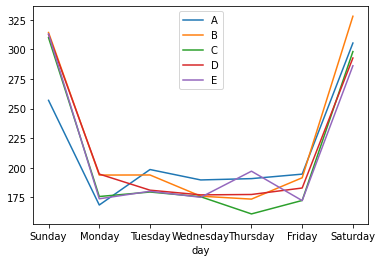

In [13]:
q['day'] = q['time'].dt.day_name()
daydf = q.groupby(['day']).mean().reindex(['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])
daydf.plot()

### 2-3 요일별 각 유형의 평균 전력 사용량 간에 연관성이 있는지 검정하라

In [14]:
daydf

,A,B,C,D,E
day,,,,,
Sunday,256.929379,314.288336,309.893995,312.615013,313.091993
Monday,168.436118,193.759166,175.623832,194.611378,173.696414
Tuesday,198.435064,193.830226,179.424797,180.975285,180.063460
Wednesday,189.627603,175.895540,175.419747,177.002098,174.973855
Thursday,190.748404,173.421020,160.904972,177.331279,197.029684
Friday,194.546056,191.467902,172.280723,182.812973,172.166683
Saturday,305.397108,328.048667,298.182008,292.749169,286.174977


In [15]:
from scipy.stats import chi2_contingency
# print(chi2_contingency(daydf))
chi2 , p ,dof, expected = chi2_contingency(daydf)
print(p)


# p-value 결과 귀무가설을 기각 할 수 없다. 두 변수는 독립적이라 볼 수 있다.

0.6422684883014576


### 2-4 일자(매일)마다 각 유형의 전력사용량의 합을 데이터프레임으로 구하고 일자 데이터에서의 유형별 온도와의 상관계수를 각각 구하여라

In [16]:
days = q.groupby(q.time.dt.date).sum().reset_index().rename(columns={'time':'date'})
days['date'] = pd.to_datetime(days['date'])
t = pd.read_csv('/kaggle/input/adp-kr-p4/problem2_avg_tem.csv')
t['date'] = pd.to_datetime(t['date'])

pd.merge(t,days).corr().iloc[0,1:].to_frame()

,temperature
A,0.001472
B,-0.048002
C,0.045952
D,-0.010146
E,0.074246
